In [1]:
from datasets.noised import DemosaicDataset

In [2]:
import torch
from torchvision import transforms

train_data_dir = "/home/safin/datasets/CASIA-WebFace/"
transform = transforms.Compose([
                         transforms.ToTensor()
                     ])
noised_dataset = DemosaicDataset(train_data_dir, transform=transform)
#     dataset_train = torchvision.datasets.ImageFolder(train_data_dir, transform=transform)
dataloader_train = torch.utils.data.dataloader.DataLoader(noised_dataset, shuffle=True, batch_size=8, pin_memory=True, num_workers=32)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
img1, img2, _ = noised_dataset[3]

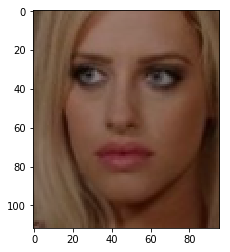

In [24]:
plt.imshow(img2.permute(1,2,0).numpy()/255)

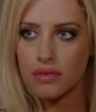

In [26]:
from PIL import Image

Image.fromarray((img2.permute(1,2,0).numpy()).astype(np.uint8))

In [11]:
img2.permute(1,2,0).numpy().max()/0.6

255.0

In [18]:
import numpy as np
import torch
import torch.nn.functional as F
import math, random
from PIL import Image


def bilinear(y):
    r""" Initialize with bilinear interpolation"""
    F_r = torch.FloatTensor([[1,2,1],[2,4,2],[1,2,1]])/4
    F_b = F_r
    F_g = torch.FloatTensor([[0,1,0],[1,4,1],[0,1,0]])/4
    bilinear_filter = torch.stack([F_r,F_g,F_b])[:,None]
    if y.is_cuda:
        bilinear_filter = bilinear_filter.cuda()
    res = F.conv2d(y, bilinear_filter,padding=1, groups=3)
    return res

def linrgb_to_srgb(img):
    """ Convert linRGB color space to sRGB 
        https://en.wikipedia.org/wiki/SRGB
    """
    assert img.dtype in [np.float32, np.float64] 
    img = img.copy()
    mask = img <= 0.0031308
    img[~mask] = (img[~mask]**(1/2.4))*(1.055) - 0.055
    img[mask] = img[mask] * 12.92
    return img

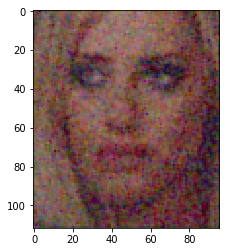

In [23]:
plt.imshow(linrgb_to_srgb(bilinear(img1.unsqueeze(0)).squeeze(0).permute(1,2,0).numpy()/255))